# Word2Vec – Hands-on Introduction to NLP Embeddings

This notebook introduces the concept of **word embeddings** using the **Word2Vec** model.

Students will learn:
- How raw text is transformed into numerical vectors.
- How the Skip-Gram architecture learns semantic relationships.
- How to extract, interpret, and visualize embeddings.

---

In [1]:
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from pprint import pprint

## 1. Text Preprocessing and Tokenization

In NLP, we must transform raw text into sequences of tokens (words).  
We will use Gensim's `simple_preprocess` method, which:
- Lowercases all words
- Removes punctuation
- Discards very short or long tokens

Let's start with a small toy corpus.

In [2]:
# Example text corpus
corpus = [
    # --- Animal domain ---
    "Cats are independent animals that love to sleep near sunny windows.",
    "Dogs are loyal companions that enjoy playing outside with their owners.",
    "A kitten usually spends hours exploring new places and chasing small toys.",
    "The puppy barked loudly when it saw another dog in the park.",
    "Veterinarians take care of both cats and dogs to keep them healthy.",
    "Some people prefer cats because they are calm, others love dogs for their energy.",
    "Feeding your pet regularly is essential for its health and happiness.",
    "The cat climbed the tree while the dog waited patiently below.",

    # --- Music domain ---
    "Classical music often features instruments like the violin, cello, and piano.",
    "Beethoven and Mozart composed symphonies that are still performed today.",
    "The orchestra played a beautiful melody led by the conductor.",
    "A violin produces sound by drawing the bow across its strings.",
    "The pianist practiced every day to master complex sonatas.",
    "Composers use harmony and rhythm to express emotion through music.",
    "Listening to a cello concerto can evoke a deep sense of calm.",
    "Many musicians start by learning basic chords on the guitar.",
    

    # -- Boring theme ---
    # "He stared at the ceiling, feeling tired and uninterested.",
    # "Nothing exciting ever happens in this quiet little town.",
    # "The movie was so dull that several people fell asleep halfway through.",
    # "She sighed as the teacher repeated the same explanation again and again.",
    # "After hours of waiting in silence, everyone felt bored and restless.",
    # "The book had no plot twists and became monotonous after the first few chapters."

    # "He has a great teacher.",
    # "Beethoven composed one, if not several, of the most beautiful symphonies ever written.",
    # "Johann Sebastian Bach was one of the pioneers of the well-tempered system.",
    # "Bach and composed some of the most important sonatas in classical music."

]


# Tokenize sentences
tokenized_corpus = [simple_preprocess(sentence) for sentence in corpus]

# print("Tokenized corpus:")
# pprint(tokenized_corpus)

## 2. Training a Word2Vec Model

We use the Gensim library to train a Skip-Gram Word2Vec model.

- `sg=1`: Skip-Gram (predict context words from target)
- `sg=0`: CBOW (predict target from context)
- `vector_size`: dimension of the embedding space $\mathbb{R}^p$
- `window`: size of the context window $C$
- `epochs`: number of passes through the data

In [3]:
# Define hyperparameters
embedding_dim = 50      # dimension of embedding space
context_window = 3      # context size C
min_word_count = 1      # minimum frequency for a word to be included

# Train Skip-Gram Word2Vec model
model = Word2Vec(
    sentences=tokenized_corpus,
    vector_size=embedding_dim,
    window=context_window,
    min_count=min_word_count,
    sg=1,                # 1 = Skip-Gram, 0 = CBOW
    epochs=100,
    seed=777
)

print("Vocabulary learned:")
print(list(model.wv.index_to_key))

Vocabulary learned:
['the', 'and', 'to', 'are', 'dogs', 'by', 'cats', 'that', 'their', 'love', 'dog', 'of', 'calm', 'for', 'music', 'violin', 'cello', 'its', 'harmony', 'chasing', 'toys', 'deep', 'puppy', 'barked', 'loudly', 'when', 'it', 'saw', 'another', 'evoke', 'in', 'park', 'veterinarians', 'take', 'care', 'can', 'both', 'keep', 'them', 'healthy', 'some', 'people', 'prefer', 'because', 'they', 'small', 'sense', 'use', 'places', 'chords', 'independent', 'animals', 'basic', 'learning', 'start', 'sleep', 'near', 'sunny', 'windows', 'musicians', 'loyal', 'companions', 'enjoy', 'playing', 'outside', 'with', 'many', 'owners', 'kitten', 'usually', 'spends', 'hours', 'exploring', 'new', 'concerto', 'others', 'listening', 'energy', 'symphonies', 'still', 'performed', 'today', 'orchestra', 'played', 'beautiful', 'melody', 'led', 'rhythm', 'conductor', 'produces', 'sound', 'drawing', 'bow', 'across', 'strings', 'pianist', 'practiced', 'every', 'day', 'master', 'complex', 'sonatas', 'composer

## 3. Extracting Word Embeddings

Each word $w \in \mathcal{V}$ is mapped to a dense vector $v_w \in \mathbb{R}^p$.  
Let's define a helper function to retrieve the embedding of any word.

In [4]:
def get_word_embedding(word: str):
    """
    Return the embedding vector of a given word from the trained Word2Vec model.

    Parameters
    ----------
    word : str
        The word whose embedding is requested.

    Returns
    -------
    np.ndarray
        The embedding vector of dimension (embedding_dim,).
        Returns None if the word is not in the vocabulary.
    """
    if word in model.wv:
        vec = model.wv[word]
        print(f"Embedding for '{word}' (dimension {len(vec)}):")
        return vec
    else:
        print(f"Word '{word}' not found in the model vocabulary.")
        return None

# Example usage
embedding_word2vec = get_word_embedding("piano")
embedding_word2vec

Embedding for 'piano' (dimension 50):


array([ 0.03615113, -0.02573817,  0.00447405, -0.0214007 , -0.02287574,
        0.03151264,  0.00143688,  0.02593554,  0.01947745,  0.03409256,
       -0.04396471,  0.02299202, -0.03545406,  0.03833433,  0.04503841,
        0.05299387,  0.03142983, -0.02984025, -0.05436712, -0.07868652,
        0.01124043, -0.04682364, -0.01433683,  0.04840811,  0.05571081,
       -0.04607441, -0.01723143,  0.00697159, -0.02348301,  0.02284313,
       -0.0135683 , -0.03569347,  0.00436241, -0.00779082, -0.04238287,
       -0.03735933, -0.01393821,  0.00754574,  0.03402802,  0.00145372,
       -0.00980193,  0.03224935,  0.04338605,  0.0328871 ,  0.03197642,
       -0.05694857,  0.0517671 , -0.09909672,  0.06169384, -0.02729964],
      dtype=float32)

## 4. Semantic Similarity in Embedding Space

Word2Vec embeddings capture **semantic similarity** through **cosine similarity**:
$$ \cos(\theta) = \frac{v_1 \cdot v_2}{\|v_1\|\|v_2\|} $$
Words with similar meanings should have a high cosine similarity.

In [5]:
# Compute cosine similarity between two words
word1="piano"; word2="pianist"
similarity = model.wv.similarity(word1, word2)
print(f"Cosine similarity between '{word1}' and '{word2}': {similarity:.3f}")

# Retrieve most similar words
print("\nWords most similar to 'piano':")
pprint(model.wv.most_similar("piano"))

Cosine similarity between 'piano' and 'pianist': 0.913

Words most similar to 'piano':
[('to', 0.9575980305671692),
 ('love', 0.9498931169509888),
 ('that', 0.947996973991394),
 ('concerto', 0.9475974440574646),
 ('the', 0.9470465779304504),
 ('sound', 0.9468406438827515),
 ('led', 0.9462361335754395),
 ('master', 0.9461432695388794),
 ('it', 0.9453572034835815),
 ('day', 0.9447250366210938)]


## 5. Visualizing the Embedding Space

To help visualize relationships, we can project high-dimensional embeddings into 2D using PCA (Principal Component Analysis).

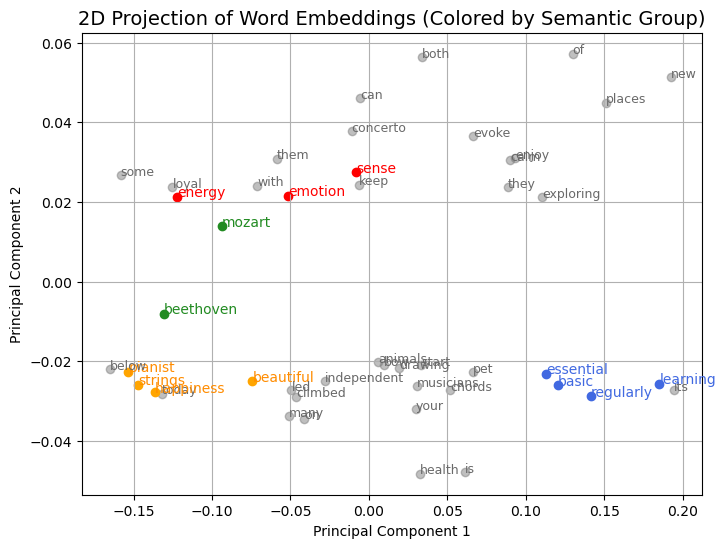

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Extract embeddings for all words
words = list(model.wv.index_to_key)
vectors = np.array([model.wv[w] for w in words])

# Define color groups
red_group = {"sense", "emotion", "energy"}
orange_group = {"happiness", "beautiful", "pianist", "strings"}
blue_group = {"essential", "basic", "regularly", "learning"}
green_group = {"bach", "beethoven", "mozart"}


# Reduce to 2D using PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)

# Filtering threshold for readability
threshold = 0.02
mask = [(abs(reduced[i, 1]) > threshold) or (words[i] in green_group) for i in range(len(words))]
filtered_words = np.array(words)[mask]
filtered_reduced = reduced[mask]

# Plot 2D projection
plt.figure(figsize=(8,6))

for i, word in enumerate(filtered_words):
    x, y = filtered_reduced[i, 0], filtered_reduced[i, 1]
    
    if word in red_group:
        plt.scatter(x, y, color="red", label="Affective terms" if "red" not in plt.gca().get_legend_handles_labels()[1] else "")
        plt.annotate(word, xy=(x, y), fontsize=10, color="red")
    elif word in orange_group:
        plt.scatter(x, y, color="orange", label="Artistic/positive terms" if "orange" not in plt.gca().get_legend_handles_labels()[1] else "")
        plt.annotate(word, xy=(x, y), fontsize=10, color="darkorange")
    elif word in blue_group:
        plt.scatter(x, y, color="royalblue", label="Procedural terms" if "royalblue" not in plt.gca().get_legend_handles_labels()[1] else "")
        plt.annotate(word, xy=(x, y), fontsize=10, color="royalblue")
    elif word in green_group:
        plt.scatter(
            x, y,
            color="forestgreen",
            label="Composers" if "forestgreen" not in plt.gca().get_legend_handles_labels()[1] else ""
        )
        plt.annotate(word, xy=(x, y), fontsize=10, color="forestgreen")
    else:
        plt.scatter(x, y, color="gray", alpha=0.5)
        plt.annotate(word, xy=(x, y), fontsize=9, color="dimgray")

plt.title("2D Projection of Word Embeddings (Colored by Semantic Group)", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
#plt.legend()
plt.grid(True)
plt.show()

### The PCA projection reveals meaningful semantic groupings.

In this projection:

- Top-left region (`sense`, `emotion`, `energy`) gathers abstract and affective concepts.
These words describe internal experiences or psychological states, suggesting that the model has learned to associate them through their frequent co-occurrence in sentences about music and feelings.
The embedding space thus captures a semantic dimension roughly aligned with emotional or sensory meaning.

- Bottom-left region (`happiness`, `beautiful`, `pianist`, `strings`) forms a cluster of aesthetic and artistic terms.
The proximity between pianist and strings reflects their shared musical context, while beautiful and happiness extend the semantic field toward positive emotional tone.
This region therefore blends artistic objects (instruments) with positive evaluations, highlighting how embeddings mix semantic and affective dimensions.

- Bottom-right region (`essential`, `basic`, `regularly`, `learning`) corresponds to practical and procedural vocabulary.
These words co-occur in sentences about practice, routine, and training.
The model has thus grouped together notions of discipline and repetition, distinct from the emotional vocabulary on the left side.

#### Overall...
This PCA visualization illustrates how Word2Vec organizes the lexicon along interpretable semantic axes:

Words such as sense, emotion, and energy cluster together, reflecting abstract and affective concepts, while happiness, beautiful, pianist, and strings group around artistic and positive themes.
In contrast, essential, basic, regularly, and learning occupy a distinct region linked to practice and structure, showing how Word2Vec organizes vocabulary along interpretable axes of emotion versus procedure.

## 6. Key Takeaways

- Word2Vec transforms discrete symbols (words) into continuous vectors.
- Semantic similarity arises from co-occurrence prediction.
- Skip-Gram: predicts context words from a target.
- CBOW: predicts target from context.
- Similar words cluster together in embedding space.

---

In [7]:
summary = {
    "Vocabulary size": len(model.wv),
    "Embedding dimension": embedding_dim,
    "Architecture": "Skip-Gram",
    "Context window": context_window
}

print("Word2Vec Model Summary:")
pprint(summary)

Word2Vec Model Summary:
{'Architecture': 'Skip-Gram',
 'Context window': 3,
 'Embedding dimension': 50,
 'Vocabulary size': 132}
